In [1]:
import sys
mainpath='c:/Kitti/Dropbox/PHD/Gridshells-EQCS' #location of folders
sys.path.insert(0, mainpath+'/Tekno') #location of python files

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import Tekno as tk
import Types as tp
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import pandas as pd
import pickle

In [3]:
import importlib #for reloading
importlib.reload(tk)
import Tekno as tk

# Parameters

materially and geometrically nonlinear finite element analysis to determine the ultimate load of the grid shell

grid shells with various span (L), span-to-height ratio (L/H), and pipe cross-section sizes (D, T)

to see results either load previously calculated and saved results or run analysis

In [4]:
Span   = 40  # m span of two-member structure
gN     = 16  # number of triangles along each span  
nb     = 4   # number of finite elements along one beam

In [5]:
n=5 # mm CHS cross-section diameter
DStart=150
DStep=50
m=1 # mm CHS cross-section thickness
tStart=5
tStep=5
print('D: ',np.arange(DStart,DStart+n*DStep,DStep))
print('t: ',np.arange(tStart,tStart+m*tStep,tStep))

D:  [150 200 250 300 350]
t:  [5]


# Load results

In [6]:
GRS = pickle.load( open(mainpath+"/Saved results/NLin_O_LperH.p", "rb" ) )
GRS2 = pickle.load( open(mainpath+"/Saved results/NLin_O_LperH2.p", "rb" ) )
GRS3 = pickle.load( open(mainpath+"/Saved results/NLin_O_LperH3.p", "rb" ) )
with pd.HDFStore(mainpath+'/Saved results/NLin_O_LperH.h5') as store:
    CapacityF=store['CapacityF']
    Capacity=store['Capacity']
    Mmax=store['Mmax']
    Nmin=store['Nmin']
    Nmax=store['Nmax']
    Dmax=store['Dmax']
    rhoA=store['rhoA']
    eqBA=store['eqBA']
    eqTA=store['eqTA']
    EA=store['EA']
    TA=store['TA']
    DA=store['DA']
    tA=store['tA']
    AA=store['AA']
    rhoA2=store['rhoA2']
    CapacityF2=store['CapacityF2']
    Capacity2=store['Capacity2']
    Mmax2=store['Mmax2']
    Nmin2=store['Nmin2']
    Nmax2=store['Nmax2']
    Dmax2=store['Dmax2']
    rhoA3=store['rhoA3']
    CapacityF3=store['CapacityF3']
    Capacity3=store['Capacity3']
    Mmax3=store['Mmax3']
    Nmin3=store['Nmin3']
    Nmax3=store['Nmax3']
    Dmax3=store['Dmax3']

In [7]:
# Load data for case without horizontal supports
with pd.HDFStore(mainpath+'/Saved results/OM_LpH.h5') as store:
    r1OM = store['r1OM'].values
    f1OM = store['f1OM'].values
    r2OM = store['r2OM'].values
    f2OM = store['f2OM'].values
    r3OM = store['r3OM'].values
    f3OM = store['f3OM'].values
    r4OM = store['r4OM'].values
    f4OM = store['f4OM'].values
    r5OM = store['r5OM'].values
    f5OM = store['f5OM'].values
    r6OM = store['r6OM'].values
    f6OM = store['f6OM'].values

# Analysis

In [4]:
Fz = -600.; #kN
MatNL = True

In [5]:
nm=n*m
CapacityF=np.zeros(nm)
Capacity=np.zeros(nm)
Mmax=np.zeros(nm)
Nmin=np.zeros(nm)
Nmax=np.zeros(nm)
Dmax=np.zeros(nm)
rhoA=np.zeros(nm)
eqBA = np.zeros(nm)
eqTA = np.zeros(nm)
EA = np.zeros(nm)
TA = np.zeros(nm)
DA = np.zeros(nm)
tA = np.zeros(nm)
AA = np.zeros(nm)
rhoA2=np.zeros(nm)
CapacityF2=np.zeros(nm)
Capacity2=np.zeros(nm)
Mmax2=np.zeros(nm)
Nmin2=np.zeros(nm)
Nmax2=np.zeros(nm)
Dmax2=np.zeros(nm)
rhoA3=np.zeros(nm)
CapacityF3=np.zeros(nm)
Capacity3=np.zeros(nm)
Mmax3=np.zeros(nm)
Nmin3=np.zeros(nm)
Nmax3=np.zeros(nm)
Dmax3=np.zeros(nm)

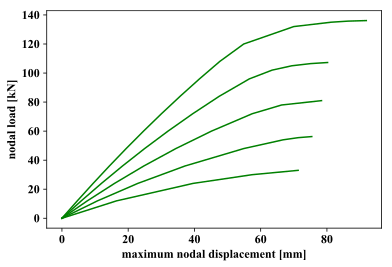

In [6]:
LperH = 8
Height = Span/LperH   # m height at apex
for i in range(n):
    D=DStart+DStep*i
    for j in range(m):
        k=i*m+j
        DA[k]=D
        t=tStart+tStep*j
        tA[k]=t
        GRS = tp.GridShell(Span,Height,D,t,gN,nb)
        tk.CreateGeom(GRS)
        GRS.SupType=1 #oldalnyomasos
        GRS.MatNL=MatNL
        tk.BuildOpsModel(GRS)
        disp, force, ID, loadA, ok = tk.Analyze(GRS, Fz, 1, 0)
        if ok:
            CapacityF[k]=loadA[-1]  #kN
            Capacity[k]=loadA[-1]*GRS.nbnBns/GRS.span**2  #kN/m2
            rhoA[k]=tk.EqProperties(GRS)
            Dmax[k],Nmin[k],Nmax[k],Mmax[k],nminid, nmaxid, mid,_=tk.GetResults(disp, force);
            eqBA[k] = GRS.eqB
            eqTA[k] = GRS.eqT
            EA[k] = GRS.Eeq
            TA[k] = GRS.teq
            AA[k] = GRS.secA
            _ = plt.plot(disp[:,ID,2],loadA, 'g') # dot plot
plt.xlabel('maximum nodal displacement [mm]')
plt.ylabel('nodal load [kN]')
plt.show()

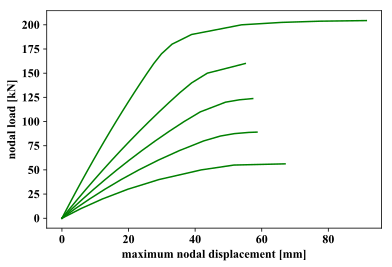

In [11]:
LperH = 5
Height = Span/LperH   # m height at apex
Fz = -500.; #kN
#GRS2.Steps = 100
for i in range(n):
    D=DStart+DStep*i
    for j in range(m):
        k=i*m+j
        t=tStart+tStep*j
        GRS2 = tp.GridShell(Span,Height,D,t,gN,nb)
        tk.CreateGeom(GRS2)
        GRS2.SupType=1 #oldalnyomasos
        GRS2.MatNL=MatNL
        tk.BuildOpsModel(GRS2)
        disp2, force2, ID2, loadA2, ok=tk.Analyze(GRS2, Fz, 1, 0)
        if ok:
            rhoA2[k]=tk.EqProperties(GRS2)
            CapacityF2[k]=loadA2[-1]  #kN
            Capacity2[k]=loadA2[-1]*GRS2.nbnBns/GRS2.span**2  #kN/m2
            Dmax2[k],Nmin2[k],Nmax2[k],Mmax2[k],nminid, nmaxid, mid,_=tk.GetResults(disp2, force2);
            _ = plt.plot(disp2[:,ID2,2],loadA2, 'g') # dot plot
plt.xlabel('maximum nodal displacement [mm]')
plt.ylabel('nodal load [kN]')
plt.show()

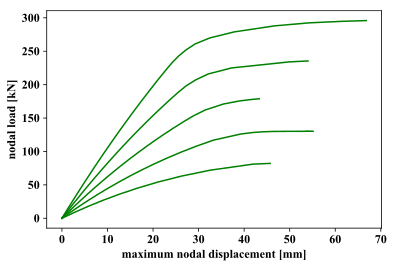

In [12]:
LperH = 3
Height = Span/LperH   # m height at apex
Fz = -450.; #kN
#GRS3.Steps = 100
for i in range(n):
    D=DStart+DStep*i
    for j in range(m):
        k=i*m+j
        t=tStart+tStep*j
        GRS3 = tp.GridShell(Span,Height,D,t,gN,nb)
        tk.CreateGeom(GRS3)
        GRS3.SupType=1 #oldalnyomasos
        GRS3.MatNL=MatNL
        tk.BuildOpsModel(GRS3)
        disp3, force3, ID3, loadA3, ok=tk.Analyze(GRS3, Fz, 1, 0)
        if ok:
            rhoA3[k]=tk.EqProperties(GRS3)
            CapacityF3[k]=loadA3[-1]  #kN
            Capacity3[k]=loadA3[-1]*GRS3.nbnBns/GRS3.span**2  #kN/m2
            Dmax3[k],Nmin3[k],Nmax3[k],Mmax3[k],nminid, nmaxid, mid,_=tk.GetResults(disp3, force3);
            _ = plt.plot(disp3[:,ID2,2],loadA3, 'g') # dot plot
plt.xlabel('maximum nodal displacement [mm]')
plt.ylabel('nodal load [kN]')
plt.show()

# Results

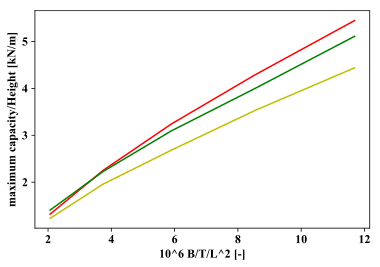

In [11]:
plt.plot(rhoA[::]*1e6,CapacityF[::]/GRS.height/5,'r', ms=5) # L/H=8
#plt.plot(rhoA[1::2]*1e6,CapacityF[1::2]/GRS.height/10,'r', ms=5) # L/H=5
plt.plot(rhoA2[::]*1e6,CapacityF2[::]/GRS2.height/5,'g', ms=5) # L/H=3
#plt.plot(rhoA2[1::2]*1e6,CapacityF2[1::2]/GRS2.height/10,'g', ms=5) # L/H=8
plt.plot(rhoA3[::]*1e6,CapacityF3[::]/GRS3.height/5,'y', ms=5) # L/H=5
#plt.plot(rhoA3[1::2]*1e6,CapacityF3[1::2]/GRS3.height/10,'y', ms=5) # L/H=3
plt.xlabel('10^6 B/T/L^2 [-]')
plt.ylabel('maximum capacity/Height [kN/m]')
plt.show()

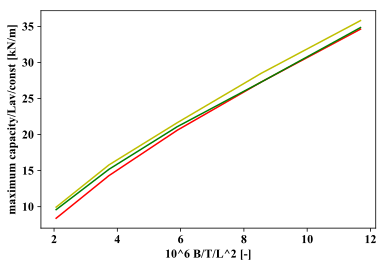

In [13]:
plt.plot(rhoA*1e6,CapacityF/GRS.Lav,'r', ms=5) # L/H=8
plt.plot(rhoA2*1e6,CapacityF2/GRS2.Lav/1.45,'g', ms=5) # L/H=5
plt.plot(rhoA3*1e6,CapacityF3/GRS3.Lav/1.9,'y', ms=5) # L/H=3
plt.xlabel('10^6 B/T/L^2 [-]')
plt.ylabel('maximum capacity/Lav/const [kN/m]')
plt.show()

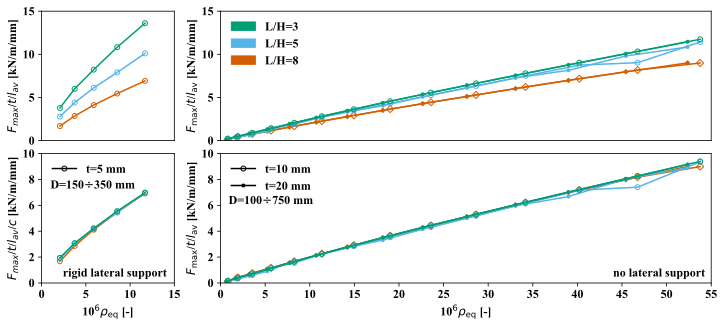

In [14]:
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(2, 75)
gs.update(hspace=0.1) # set the spacing between axes.
sms = 5
c1=[c/255. for c in [213., 94., 0.]] # vermillion
c2=[c/255. for c in [86, 180, 233]] # sky blue
c3=[c/255. for c in [0, 158, 115]] # bluish green

ax1 = plt.subplot(gs[0, :15])
plt.plot(rhoA*1e6,CapacityF/GRS.Lav/5,'o-',c=c1, ms=sms,fillStyle='none') # L/H=8
plt.plot(rhoA2*1e6,CapacityF2/GRS2.Lav/5,'o-',c=c2, ms=sms,fillStyle='none') # L/H=5
plt.plot(rhoA3*1e6,CapacityF3/GRS3.Lav/5,'o-',c=c3, ms=sms,fillStyle='none') # L/H=3
plt.ylabel('$F_{max}$/$t$/$l_{av}$ [kN/m/mm]')
plt.xlim(0,15)
plt.ylim(0,15)
plt.xticks([])
plt.yticks(np.arange(0,15.1,5))

ax3 = plt.subplot(gs[1, :15])
plt.plot(rhoA*1e6,CapacityF/GRS.Lav/5,'o-',c=c1, ms=sms,fillStyle='none') # L/H=8
plt.plot(rhoA2*1e6,CapacityF2/GRS2.Lav/5/1.45,'o-',c=c2, ms=sms,fillStyle='none') # L/H=5
plt.plot(rhoA3*1e6,CapacityF3/GRS3.Lav/5/1.95,'o-',c=c3, ms=sms,fillStyle='none') # L/H=3
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')
plt.ylabel('$F_{max}$/$t$/$l_{av}$/$c$ [kN/m/mm]')
plt.xlim(0,15)
plt.ylim(0,10)
plt.xticks(np.arange(0,15.1,5))
plt.yticks(np.arange(0,10.1,2))

t1_dot = mlines.Line2D([], [], color='k', marker='o',markersize=sms, label='t=5 mm',fillStyle='none',linestyle='-')
plt.legend(handles=[t1_dot],frameon=False,loc=2)

ax3.text(2.4, 0.5, 'rigid lateral support')
b_patch = mpatches.Patch(color=c3, label='L/H=3')
g_patch = mpatches.Patch(color=c2, label='L/H=5')
r_patch = mpatches.Patch(color=c1, label='L/H=8')
ax3.text(1, 7.3, 'D=150$\div$350 mm')

ax2 = plt.subplot(gs[0, 20:])   
plt.plot(r1OM*1e6,f1OM,'D-',c=c1, ms=sms,fillStyle='none')
plt.plot(r2OM*1e6,f2OM,'D-',c=c1, ms=3)
plt.plot(r3OM*1e6,f3OM,'o-',c=c2, ms=sms,fillStyle='none')
plt.plot(r4OM*1e6,f4OM,'o-',c=c2, ms=3)
plt.plot(r5OM*1e6,f5OM,'o-',c=c3, ms=sms,fillStyle='none')
plt.plot(r6OM*1e6,f6OM,'o-',c=c3, ms=3)
plt.ylabel('$F_{\\rm max}$/$t$/$l_{\\rm av}$ [kN/m/mm]')
plt.ylim(0,15)
plt.xlim(0,55)
plt.yticks(np.arange(0,15.1,5))
plt.xticks([])

t1_dot = mlines.Line2D([], [], color='k', marker='D',markersize=sms, label='t=5 mm',linestyle='-',fillStyle='none')
t2_dot = mlines.Line2D([], [], color='k', marker='o',markersize=sms, label='t=10 mm',linestyle='-',fillStyle='none')
t3_dot = mlines.Line2D([], [], color='k', marker='D',markersize=3, label='t=15 mm',linestyle='-')
t4_dot = mlines.Line2D([], [], color='k', marker='o',markersize=3, label='t=20 mm',linestyle='-')
plt.legend(handles=[b_patch,g_patch,r_patch],frameon=False,loc=2)

ax4 = plt.subplot(gs[1, 20:])   
plt.plot(r1OM*1e6,f1OM,'D-',c=c1, ms=sms,fillStyle='none')
plt.plot(r2OM*1e6,f2OM,'D-',c=c1, ms=3)
plt.plot(r3OM*1e6,f3OM/1.22,'o-',c=c2, ms=sms,fillStyle='none')
plt.plot(r4OM*1e6,f4OM/1.22,'o-',c=c2, ms=3)
plt.plot(r5OM*1e6,f5OM/1.25,'o-',c=c3, ms=sms,fillStyle='none')
plt.plot(r6OM*1e6,f6OM/1.25,'o-',c=c3, ms=3)
plt.ylabel('$F_{\\rm max}$/$t$/$l_{\\rm av}$ [kN/m/mm]')
plt.ylim(0,10)
plt.xlim(0,55)
plt.legend(handles=[t2_dot,t4_dot],frameon=False,loc=2)

ax4.text(44, 0.5, 'no lateral support')
ax4.text(0.9, 6.1, 'D=100$\div$750 mm')
plt.xticks(np.arange(0,55.1,5))
plt.yticks(np.arange(0,10.1,2))
plt.xlabel('10$^6\\rho_{\\rm eq}$ [-]')

plt.savefig('NLinLpH.pdf', bbox_inches='tight')

plt.show()

# Save results

In [25]:
df1 = pd.DataFrame(CapacityF)
df2 = pd.DataFrame(Capacity)
df3 = pd.DataFrame(Mmax)
df4 = pd.DataFrame(Nmin)
df5 = pd.DataFrame(Nmax)
df6 = pd.DataFrame(Dmax)
df7 = pd.DataFrame(rhoA)
df8 = pd.DataFrame(eqBA)
df9 = pd.DataFrame(eqTA)
df10 = pd.DataFrame(EA)
df11 = pd.DataFrame(TA)
df12 = pd.DataFrame(DA)
df13 = pd.DataFrame(tA)
df14 = pd.DataFrame(AA)
df15 = pd.DataFrame(rhoA2)
df16 = pd.DataFrame(CapacityF2)
df17 = pd.DataFrame(Capacity2)
df18 = pd.DataFrame(Mmax2)
df19 = pd.DataFrame(Nmin2)
df20 = pd.DataFrame(Nmax2)
df21 = pd.DataFrame(Dmax2)
df22 = pd.DataFrame(rhoA3)
df23 = pd.DataFrame(CapacityF3)
df24 = pd.DataFrame(Capacity3)
df25 = pd.DataFrame(Mmax3)
df26 = pd.DataFrame(Nmin3)
df27 = pd.DataFrame(Nmax3)
df28 = pd.DataFrame(Dmax3)
pickle.dump(GRS, open(mainpath+'/Saved results/NLin_O_LperH.p", "wb" ) )
pickle.dump(GRS2, open( mainpath+'/Saved results/NLin_O_LperH2.p", "wb" ) )
pickle.dump(GRS3, open(mainpath+'/Saved results/NLin_O_LperH3.p", "wb" ) )
with pd.HDFStore(mainpath+'/Saved results/NLin_O_LperH.h5') as store:
    store['CapacityF']=df1
    store['Capacity']=df2
    store['Mmax']=df3
    store['Nmin']=df4
    store['Nmax']=df5
    store['Dmax']=df6
    store['rhoA']=df7
    store['eqBA']=df8
    store['eqTA']=df9
    store['EA']=df10
    store['TA']=df11
    store['DA']=df12
    store['tA']=df13
    store['AA']=df14
    store['rhoA2']=df15
    store['CapacityF2']=df16
    store['Capacity2']=df17
    store['Mmax2']=df18
    store['Nmin2']=df19
    store['Nmax2']=df20
    store['Dmax2']=df21
    store['rhoA3']=df22
    store['CapacityF3']=df23
    store['Capacity3']=df24
    store['Mmax3']=df25
    store['Nmin3']=df26
    store['Nmax3']=df27
    store['Dmax3']=df28